# Fitting Data from an Experiment

The generic physics experiment goes as follows:  we measure some quantity, $y$, as a function of some other quantity, $x$.  We plot that data, and then we attempt to find a function, $y_{fit} = f(x)$ that best describes the data.  Typically, the function $f(x)$
will contain several parameters.  We seek to determine the values of these parameters (with uncertainties!) that give the best fit to the data, and then in turn we may be able to
extract interesting physics knowledge through the comparison of the parameter values to
either a theoretical prediction, or other measurments, or both.

In addition, in most (maybe all?) experiments, we have uncertainties,$\delta y$, associated with each data point.  We should understand more about how this affects the fitting procedure.

One of the oldest and still more relied upon methods for determining the optimal parameters of the fitting function is a method called "Ordinary Least Squares".  The basic theory behind this is as follows:

We first define a measure of the goodness of the fit:

$\chi^2 = \sum_i^N (y_i - y_{fit}(x_i))^2$

Note that $y_{fit}(x_i)$ necessarily depends on some number of parameters, $(a,b,c,...)$. For example, for a quadratic fitting function, we might have that:

$y_{fit}(x) = a x^2 + b x + c$

In order to make $\chi^2$ as small as possible, i.e. find its $minimum$ value, we must solve the set of equations defined by:

$\frac{\partial \chi^2}{\partial a} = 0, \frac{\partial \chi^2}{\partial b} = 0, \frac{\partial \chi^2}{\partial c} = 0, ...$

As it turns out, is the case of polynomial fitting functions (of any order), the values of the polynomial coefficients are uniquely defined.  That is, there is a single global minimum in the $\chi^2$ function.  For other non-linear fitting functions, there may be local minima in the $\chi^2$ function, and this requires that we provide initial starting values for the parameters of the fitting function that are close to the global minimum.

When we have uncertainties for each of the $N$ data points, the definition of $\chi^2$ becomes:

$\chi^2 = \sum_i^N \left (\frac{y_i - y_{fit}(x_i)}{\sigma_i}\right)^2$

The procedure for finding the values of the parameters that minimize $\chi^2$, together with
the uncertainties in these parameters, is beyond the scope of this document.  We are going to make use of some pre-defined functions and methods to accomplish this task (defined in another external Python file, as noted below).

### Let us now investigate how uncertainties affect both (a) the fit parameters and (b) the confidence interval on the fit.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

from P201_Functions import *

# One can get help on any of the functions in P201_Functions like this:
help(linear_fit_plot)

# The following lines make plots in dark mode look reasonable.  If you are not using dark
# mode you don't need them, but you can also just leave them here, but you will need to set
# dark_mode = False

dark_mode = True
# plotting choices for dark-mode
if (dark_mode):
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
    linecolor = 'w'
else:
    linecolor = 'k'

Help on function linear_fit_plot in module P201_Functions.P201_Functions:

linear_fit_plot(xi, yi, plot_name, x_low='', x_high='', labelstring='Linear Fit', linestring='r-')
    linear_fit_plot(xi,yi,plot_name,x_low="",x_high="",labelstring="Linear Fit",linestring="r-")
    
    Fits a set of (x,y) data with a linear function, y = mx + b.
    
    Arguments:
        xi: array of x values
        yi: array of y values
        plot_name: matlibpolot.pylot plot name
        x_low: lower x limit of fit (optional)
        x_high: upper x limit of fit (optional)
        label_string: Label for plotted data (optional)
        line_string: Python plotting code for plot symbol and color (optional)
    Returns:
        y-intercept, slope, error in y-intercept, error in slope



In [2]:
# create some fake data

npts = 11
xlow = 0.5
xhigh = 5.5

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)

# The "equation" that we will fit in all of these examples is the line y=x.  Thus, we expect,
# in all cases, a slope of 1 and a y-intercept of 0.

yi = xi + yrandom


Text(0.5, 1.0, 'No Uncertainties')

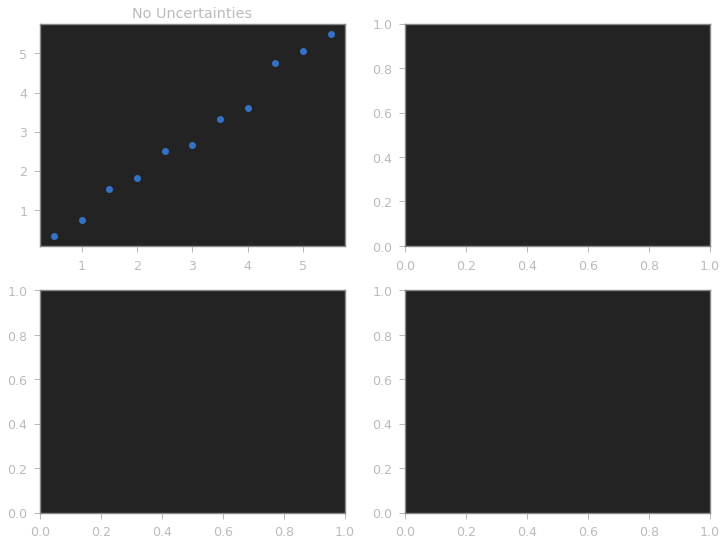

In [3]:
# Let's plot this data, just to see what it looks like
# Make a "figure" that has four panels (2 x 2) and is of a reasonable size for visualization
# Assign convenient names to each of the four panels

plt.rcParams["figure.figsize"] = (12,9)

figure, axis = plt.subplots(2, 2)
plot1 = plt.subplot2grid((2, 2), (0, 0), rowspan=1, colspan=1)
plot2 = plt.subplot2grid((2, 2), (0, 1), rowspan=1, colspan=1)
plot3 = plt.subplot2grid((2, 2), (1, 0), rowspan=1, colspan=1)
plot4 = plt.subplot2grid((2, 2), (1, 1), rowspan=1, colspan=1)

# Plot the data in the upper left panel, and give this panel a title
plot1.plot(xi,yi,'o')
plot1.set_title("No Uncertainties")


## Case 1:  Linear Fit with No Uncertainties

Linear Fit: Coefficients (from curve_fit)
[-0.22403909  1.03982326]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 0.01583831 -0.00413173]
 [-0.00413173  0.00137724]]

Linear Fit: Final Result: y = (1.03982 +/- 0.03711) x + (-0.22404 +/- 0.12585)



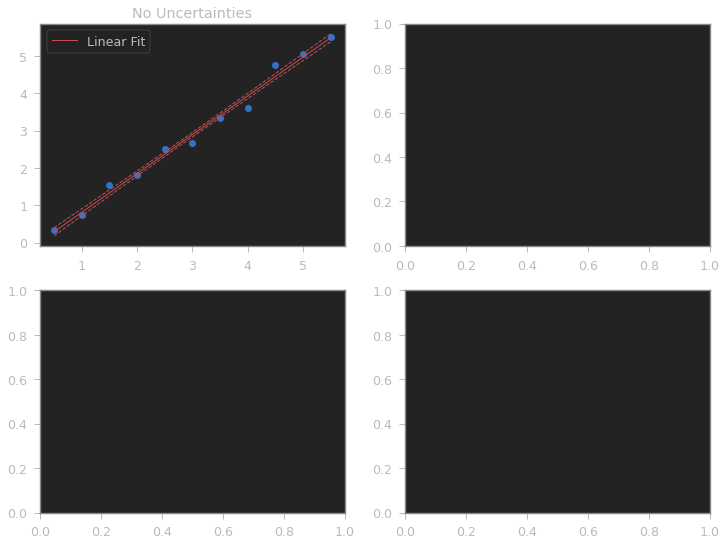

In [4]:
# Takes the x and y values to make a trendline
#
# The function called linear_fit_plot() is defined externally, and takes five parameters:
# 1. Vector of x data
# 2. Vector of y data
# 3. Name of the panel in which to plot the data
# 4. Low value of x to consider
# 5. High value of x to consider
#
# The function returns the y-intercept and slope, as well as the uncertainties in these values.

b, m, db, dm = linear_fit_plot(xi,yi,plot1,0.0,6.0)

# Adds the legend to the plot
plot1.legend()

# Since we are going to be comparing the results of fitting different data sets, create
# and stat to fill some arrays to hold the fit results - (slope +/- dslope), (yint +/ dyint)

slope = []
dslope = []
yint = []
dyint = []
type = []

# Save the values of slope, intercept, and uncertainties for later comparison

slope.append(m)
dslope.append(dm)
yint.append(b)
dyint.append(db)
type.append('None')

# Plot the entire figure, which will now include the fit to the data
# The solid red line indicates the line of best fit, and the dashed lines indicate
# a 95% confidence band, based on the determined uncertainties.

figure

## Case 2:  Linear Fit with Uniform Uncertainties

Linear Fit: Coefficients (from curve_fit)
[-0.10309885  1.02287635]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 0.00992678 -0.00258959]
 [-0.00258959  0.0008632 ]]

Linear Fit: Final Result: y = (1.02288 +/- 0.02938) x + (-0.10310 +/- 0.09963)



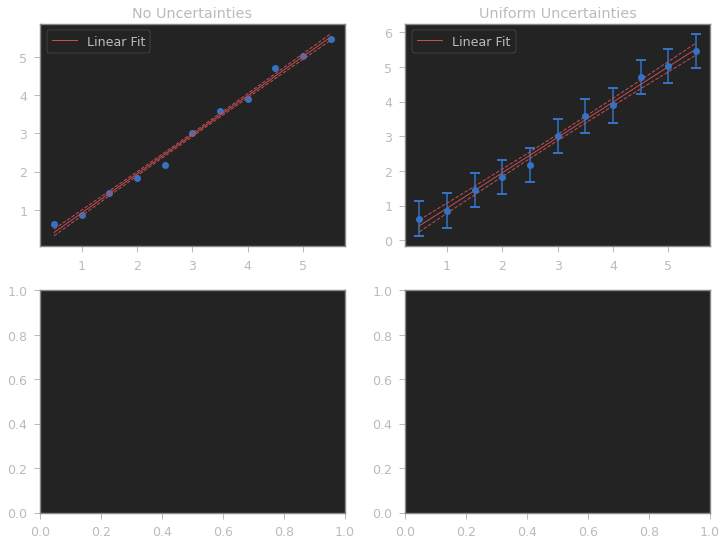

In [5]:
# Define an array of uncertainties for each data point ... make these uncertainties the same
# for each data point (for now).
sigmai = np.array([0.5 for i in range(npts)])

# Plot the data, with these uncertainties, and give the panel a title.
plot2.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)
plot2.set_title("Uniform Uncertainties")

# Takes the x and y values to make a trendline
#
# The function called linear_fit_plot_errors() is defined externally, and takes six parameters:
# 1. Vector of x data
# 2. Vector of y data
# 3. Vector of errors in the y data
# 4. Name of the panel in which to plot the data
# 5. Low value of x to consider
# 6. High value of x to consider
#
# The function returns the y-intercept and slope, as well as the uncertainties in these values.
b, m, db, dm = linear_fit_plot_errors(xi,yi,sigmai,plot2,0.0,6.0)

# Adds the legend to the plot
plot2.legend()

# Since we are going to be comparing the results of fitting different data sets, 
# fill the arrays that hold the fit results - (slope +/- dslope), (yint +/ dyint)

slope.append(m)
dslope.append(dm)
yint.append(b)
dyint.append(db)
type.append('Uniform')

figure

## Case 3:  Linear Fit with Increasing Uncertainties

Linear Fit: Coefficients (from curve_fit)
[0.13599655 0.91483426]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 0.00204295 -0.00148899]
 [-0.00148899  0.00196789]]

Linear Fit: Final Result: y = (0.91483 +/- 0.04436) x + (0.13600 +/- 0.04520)



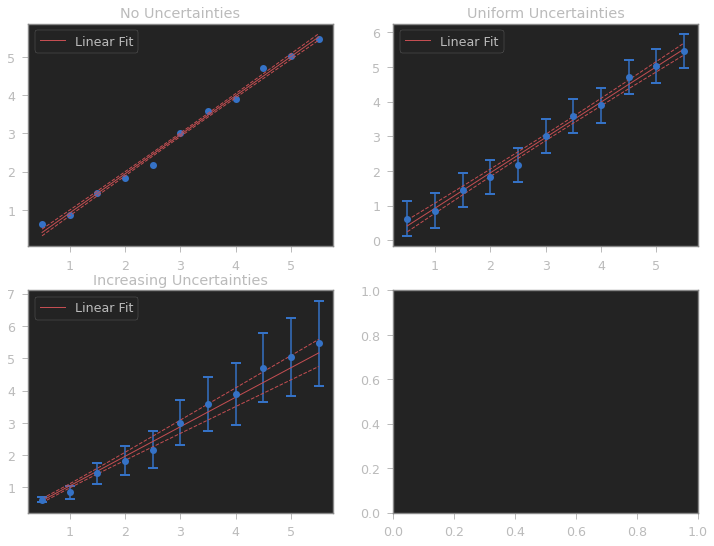

In [6]:
# Create an array of uncertainties in y that increase with increasing x
xl = xlow + 0.1
sigmai = np.array([0.1 + 0.25*(xi[i]-xl) for i in range(npts)])

plot3.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)
plot3.set_title("Increasing Uncertainties")

# Takes the x and y values to make a trendline
b, m, db, dm = linear_fit_plot_errors(xi,yi,sigmai,plot3,0.0,6.0)

# Adds the legend to the plot
plot3.legend()

# Since we are going to be comparing the results of fitting different data sets, create
# and stat to fill some arrays to hold the fit results - (slope +/- dslope), (yint +/ dyint)

slope.append(m)
dslope.append(dm)
yint.append(b)
dyint.append(db)
type.append('Increasing')

figure

## Case 4:  Linear Fit with Increasing Uncertainties at Endpoints

Linear Fit: Coefficients (from curve_fit)
[-0.64518558  1.14029604]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 0.06360975 -0.02465713]
 [-0.02465713  0.00972064]]

Linear Fit: Final Result: y = (1.14030 +/- 0.09859) x + (-0.64519 +/- 0.25221)



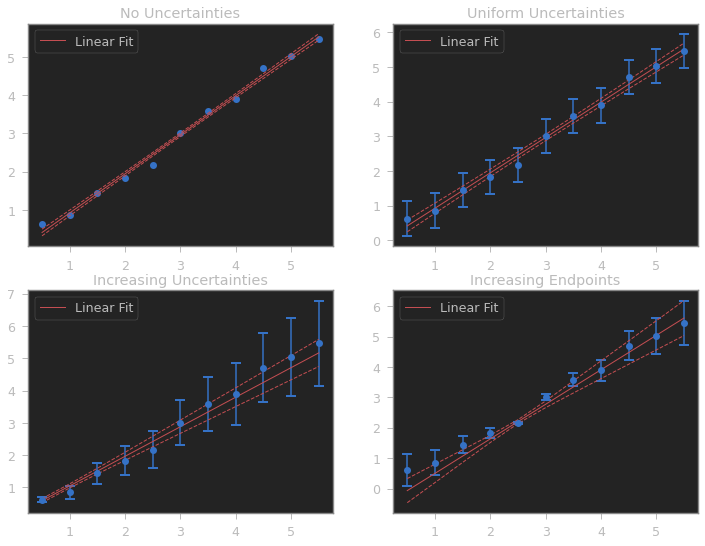

In [7]:
# Create an array of errors in y that are larger at the endpoints and smaller
# in the middle
xmid = (xlow+xhigh)/2.0+0.01
sigmai = np.array([0.1+ 0.25*(xi[i]-xmid) for i in range(npts)])
plot4.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)
plot4.set_title("Increasing Endpoints")

# Takes the x and y values to make a trendline
b, m, db, dm = linear_fit_plot_errors(xi,yi,sigmai,plot4,0.0,6.0)

# Adds the legend to the plot
plot4.legend()

# Since we are going to be comparing the results of fitting different data sets, create
# and stat to fill some arrays to hold the fit results - (slope +/- dslope), (yint +/ dyint)

slope.append(m)
dslope.append(dm)
yint.append(b)
dyint.append(db)
type.append('Endpoints')

figure

## Preliminary Conclusions

1. If the uncertainties are uniform, there is no impact on the uncertainties in the fit parameters, the uncertainties in the fit parameters, or the confidence bands.  This can be understood mathematically by considering the dependence of $\chi^2$ on $\sigma_i$; if all $\sigma_i$ are the same, then there is no dependence of the derivatives of $\chi^2$ on $\sigma_i$.

2. If the uncertainties are non-uniform, the resulting fit parameters and confidence bands will depend upon the $\sigma_i$ in a complicated way!



In [8]:
# Create a pandas dataframe to store the fit information
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,None,1.022876,0.029380,-0.103099,0.099633
1,Uniform,1.022876,0.029380,-0.103099,0.099633
2,Increasing,0.914834,0.044361,0.135997,0.045199
3,Endpoints,1.140296,0.098593,-0.645186,0.252210


## Case 5:  Determining the Y-intercept with increasing uncertainties at small x

In many experiments, the uncertainties increase as the independent variable ($x$) becomes small.  We seek to understand how best to design our experiment in these situations to optimize the determination of the y-intercept (at $x=0$).

Linear Fit: Coefficients (from curve_fit)
[-0.17741162  1.04216827]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 0.0229715  -0.00511349]
 [-0.00511349  0.0012273 ]]

Linear Fit: Final Result: y = (1.04217 +/- 0.03503) x + (-0.17741 +/- 0.15156)



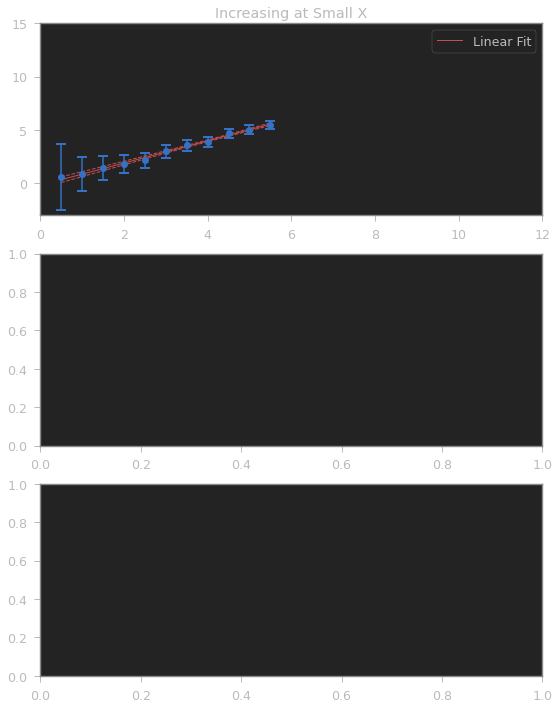

In [9]:
# Create a new (second) figure for comparison of three different situations
plt.rcParams["figure.figsize"] = (9,12)

figure2, axis = plt.subplots(3, 1)

plot1 = plt.subplot2grid((3, 1), (0, 0), rowspan=1, colspan=1)
plot2 = plt.subplot2grid((3, 1), (1, 0), rowspan=1, colspan=1)
plot3 = plt.subplot2grid((3, 1), (2, 0), rowspan=1, colspan=1)

# create an array of y uncertainties that are increasing as x decreases

sigmai = np.array([0.1+ 1.5/np.abs(xi[i]) for i in range(npts)])
plot1.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)
plot1.set_title("Increasing at Small X")
plot1.set_xlim([0,12])
plot1.set_ylim([-3,15])

# Takes the x and y values to make a trendline
b, m, db, dm = linear_fit_plot_errors(xi,yi,sigmai,plot1,0.0,12.0)

# Adds the legend to the plot
plot1.legend()

# Since we are going to be comparing the results of fitting different data sets, create
# and stat to fill some arrays to hold the fit results - (slope +/- dslope), (yint +/ dyint)

slope.append(m)
dslope.append(dm)
yint.append(b)
dyint.append(db)
type.append('Increasing at Small X')

## Preliminary Conclusion:  our knowledge of the y-intercept is very limited!

In [10]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,None,1.022876,0.029380,-0.103099,0.099633
1,Uniform,1.022876,0.029380,-0.103099,0.099633
2,Increasing,0.914834,0.044361,0.135997,0.045199
3,Endpoints,1.140296,0.098593,-0.645186,0.252210
4,Increasing at Small X,1.042168,0.035033,-0.177412,0.151564


## Case 6:   Decrease the range of x - Focus on the small x region

What is the impact of taking the same amount of data as in the original experiment, but focusing on the small x region?

Linear Fit: Coefficients (from curve_fit)
[-0.22011474  1.17771735]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 0.03443133 -0.02783153]
 [-0.02783153  0.02373688]]

Linear Fit: Final Result: y = (1.17772 +/- 0.15407) x + (-0.22011 +/- 0.18556)



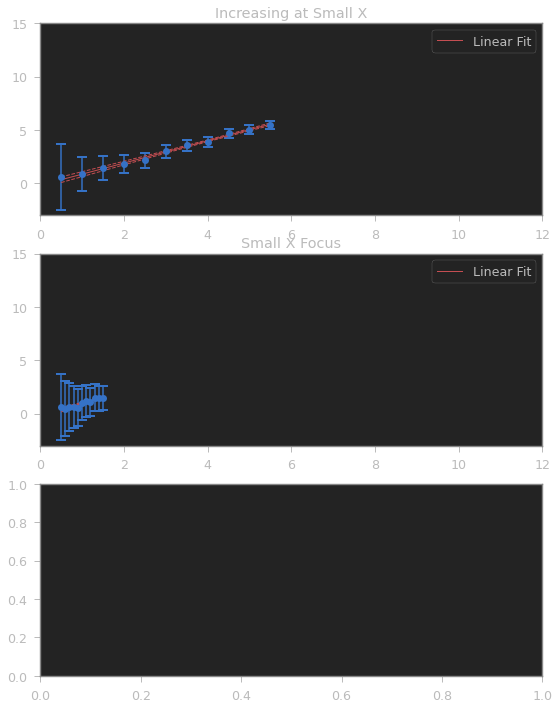

In [11]:
# create some fake data

npts = 11
xlow = 0.5
xhigh = 1.5

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yi = xi + yrandom

sigmai = np.array([0.1+ 1.5/np.abs(xi[i]) for i in range(npts)])
plot2.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)
plot2.set_title("Small X Focus")
plot2.set_xlim([0,12])
plot2.set_ylim([-3,15])

# Takes the x and y values to make a trendline
b, m, db, dm = linear_fit_plot_errors(xi,yi,sigmai,plot2,0.0,12.0)

# Adds the legend to the plot
plot2.legend()

# Since we are going to be comparing the results of fitting different data sets, create
# and stat to fill some arrays to hold the fit results - (slope +/- dslope), (yint +/ dyint)

slope.append(m)
dslope.append(dm)
yint.append(b)
dyint.append(db)
type.append('Small X Focus')

figure2

In [12]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head(10)

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,None,1.022876,0.029380,-0.103099,0.099633
1,Uniform,1.022876,0.029380,-0.103099,0.099633
2,Increasing,0.914834,0.044361,0.135997,0.045199
3,Endpoints,1.140296,0.098593,-0.645186,0.252210
4,Increasing at Small X,1.042168,0.035033,-0.177412,0.151564
5,Small X Focus,1.177717,0.154068,-0.220115,0.185557


## Case 7:   Increase the range of x - create a larger lever arm

What is the impact of taking the same amount of data as in the original experiment, but increasing the x range, so as to creat a larger lever arm?

Linear Fit: Coefficients (from curve_fit)
[-0.18055191  1.02083551]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 0.02054514 -0.00222006]
 [-0.00222006  0.00026128]]

Linear Fit: Final Result: y = (1.02084 +/- 0.01616) x + (-0.18055 +/- 0.14334)



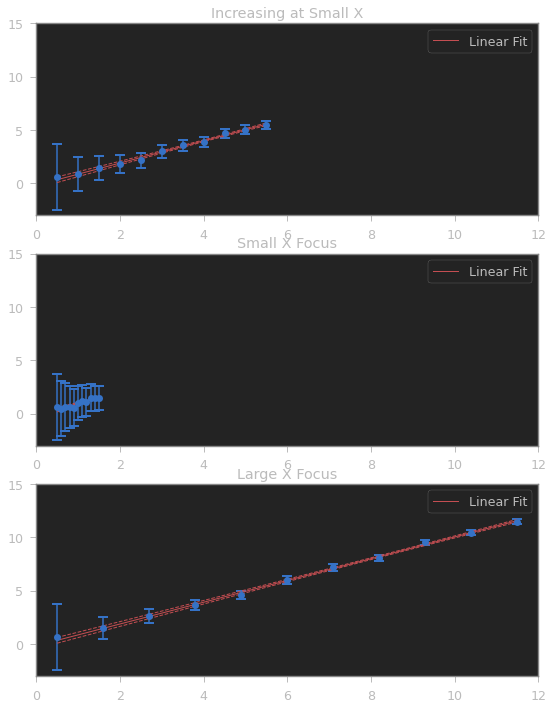

In [13]:
# create some fake data

npts = 11
xlow = 0.5
xhigh = 11.5

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yi = xi + yrandom

sigmai = np.array([0.1+ 1.5/np.abs(xi[i]) for i in range(npts)])
plot3.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)
plot3.set_title("Large X Focus")
plot3.set_xlim([0,12])
plot3.set_ylim([-3,15])

# Takes the x and y values to make a trendline
b, m, db, dm = linear_fit_plot_errors(xi,yi,sigmai,plot3,0.0,12.0)

# Adds the legend to the plot
plot3.legend()

# Since we are going to be comparing the results of fitting different data sets, create
# and stat to fill some arrays to hold the fit results - (slope +/- dslope), (yint +/ dyint)

slope.append(m)
dslope.append(dm)
yint.append(b)
dyint.append(db)
type.append('Large X Range')

figure

figure2

In [14]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head(10)

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,None,1.022876,0.029380,-0.103099,0.099633
1,Uniform,1.022876,0.029380,-0.103099,0.099633
2,Increasing,0.914834,0.044361,0.135997,0.045199
3,Endpoints,1.140296,0.098593,-0.645186,0.252210
4,Increasing at Small X,1.042168,0.035033,-0.177412,0.151564
5,Small X Focus,1.177717,0.154068,-0.220115,0.185557
6,Large X Range,1.020836,0.016164,-0.180552,0.143336


## Conclusions

1. If the uncertainties are increasing with decreasing $x$, we are actually better off, in both the determination of the slope $and$ the y-intercept, to INCREASE the range of $x$ of the measurements!
